# Regression

## Linear Regression

In [2]:
import numpy as np
import pandas as pd

df = pd.read_excel('./data/heart_disease.xlsx')
df.shape
df

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,0,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49,1
5,132,6.20,6.47,36.21,1,62,30.77,14.14,45,0
6,142,4.05,3.38,16.20,0,59,20.81,2.62,38,0
7,114,4.08,4.59,14.60,1,62,23.11,6.72,58,1
8,114,0.00,3.83,19.40,1,49,24.86,2.49,29,0
9,132,0.00,5.80,30.96,1,69,30.11,0.00,53,1


In [2]:
#If we need to Remove outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
df_no_outliers=df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_no_outliers.shape

(379, 10)

In [3]:
raw_data = df.get_values()
#raw_data = df_no_outliers.get_values()

cols = range(0,9) 
X = raw_data[:, cols]
attributeNames = np.asarray(df.columns[cols])

classLabels = raw_data[:,-1] # -1 takes the last column
classNames = np.unique(classLabels)
classDict = dict(zip(classNames,range(len(classNames))))

y = np.array([classDict[cl] for cl in classLabels])

N, M = X.shape
C = len(classNames)


In [4]:
# Remove attribute famhist 
rem_attr= list(df.columns).index('famhist')
X=np.delete(X,rem_attr,1)
attributeNames = np.delete(attributeNames,rem_attr)
# Update N and M
N, M = X.shape

In [27]:
X.shape

(462, 8)

In [28]:
attributeNames

array(['sbp', 'tobacco', 'ldl', 'adiposity', 'typea', 'obesity',
       'alcohol', 'age'], dtype=object)


### Selecting appropriate features

residual of sbp:6460.896573388224
residual of tobacco:1267.2776779929231
residual of ldl:619.4691436212354
residual of adiposity:1436.293161601319
residual of typea:3489.0896990115816
residual of obesity:874.3006810015968
residual of alcohol:7583.163906408289
residual of age:3670.8917550544625


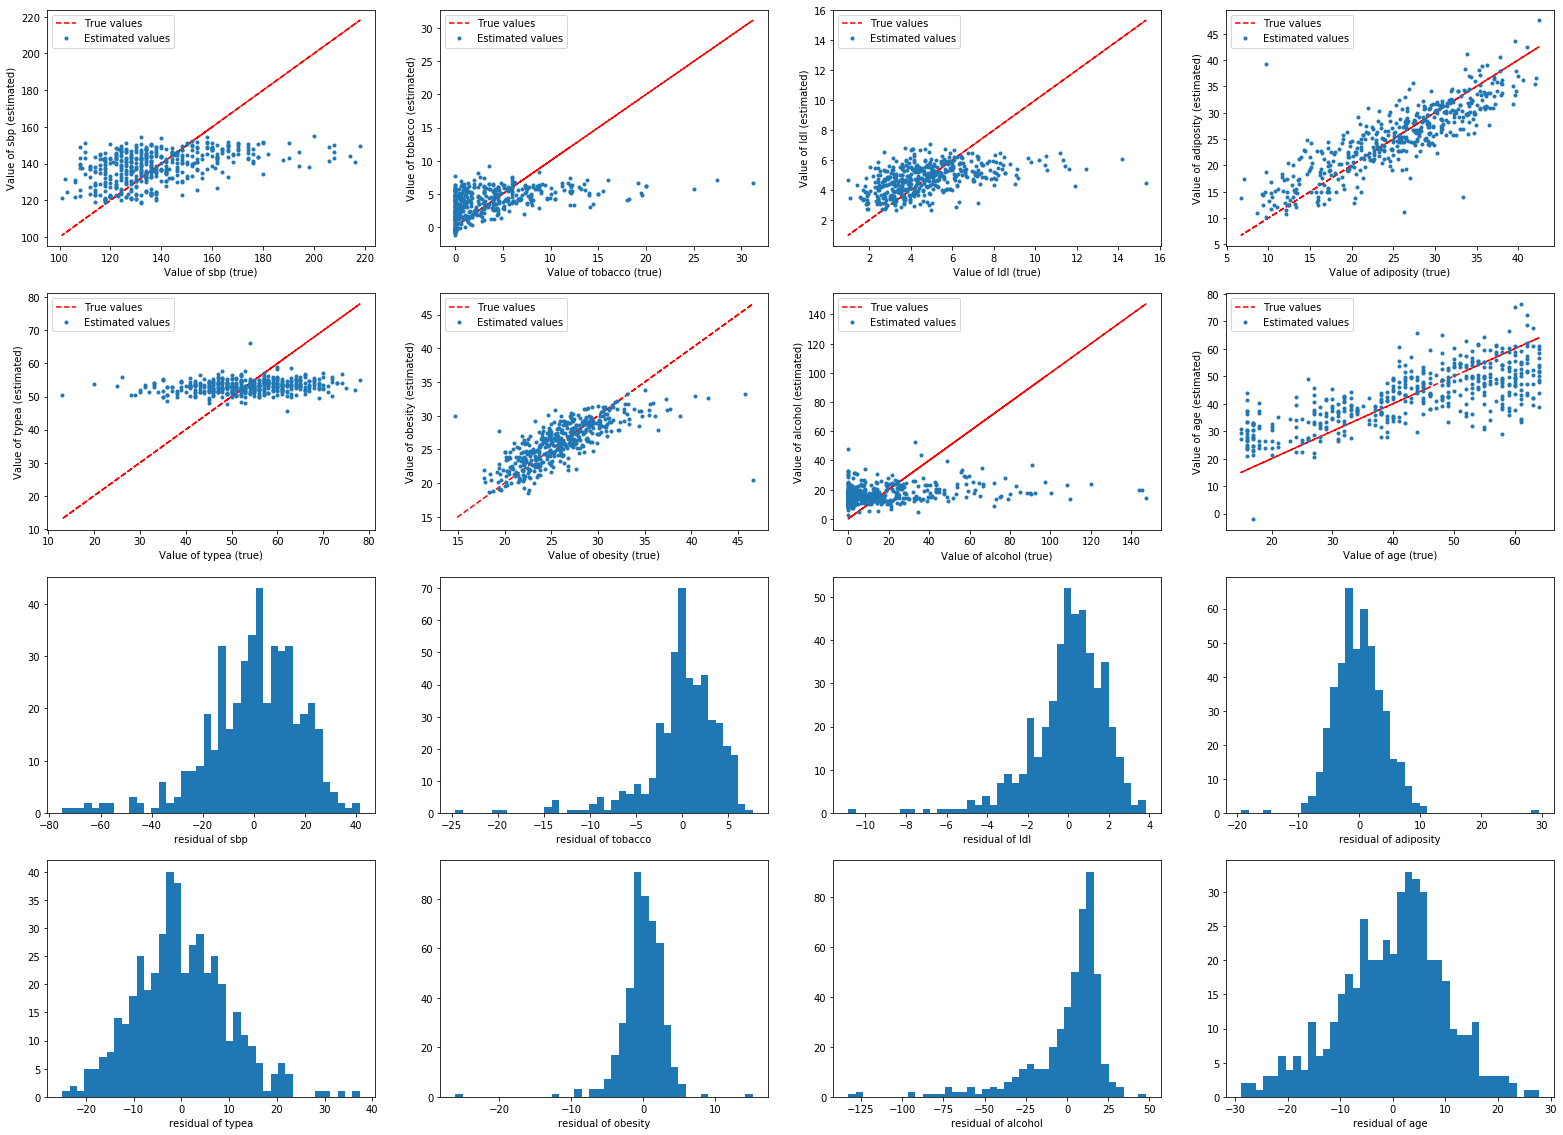

In [17]:
# exercise 5.2.4
from matplotlib.pylab import figure, subplot, plot, xlabel, ylabel, hist, show,legend
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
#import import_ipynb
#import Decision_tree

# requires wine data from exercise 5.1.5
#from ex5_1_5 import *

plt.figure(figsize=(27,20))
plt.subplots_adjust(wspace = 0.2)
plt.subplots_adjust(hspace = 0.2)

for i in range(8):
    
    # Split dataset into features and target vector
    attr_idx = list(attributeNames).index(attributeNames[i])
    y1 = X[:,attr_idx]

    X_cols = list(range(0,attr_idx)) + list(range(attr_idx+1,len(attributeNames)))
    X1 = X[:,X_cols]

    # Fit ordinary least squares regression model
    model = lm.LinearRegression()
    model.fit(X1,y1)

    # Predict alcohol content
    y_est = model.predict(X1)
    residual = y_est-y1
    residual_abs=np.abs(residual)
    print('residual of {0}:{1}'.format(attributeNames[i],residual_abs.sum()))
    
    # Display scatter plot
    subplot(4,4,i+1)
    plot(y1, y1, '--r')
    plot(y1, y_est, '.')
    xlabel('Value of {0} (true)'.format(attributeNames[i]))
    ylabel('Value of {0} (estimated)'.format(attributeNames[i]))
    legend(['True values', 'Estimated values'], loc = 2);
    
    subplot(4,4,i+9)
    hist(residual,40)
    xlabel('residual of {0}'.format(attributeNames[i]))
    
    
show()

In [37]:
# exercise 6.2.1
from matplotlib.pyplot import figure, plot, subplot, title, xlabel, ylabel, show, clim
from scipy.io import loadmat
import sklearn.linear_model as lm
from sklearn import model_selection
from toolbox_02450 import feature_selector_lr, bmplot
import numpy as np

df = pd.read_excel('./data/heart_disease.xlsx')
raw_data = df.get_values()

attributeNames = np.asarray(df.columns)

attr_idx= list(df.columns).index('obesity')
y = raw_data[:,attr_idx]

X_cols = list(range(0,attr_idx)) + list(range(attr_idx+1,len(df.columns)))
X = raw_data[:,X_cols]

attributeNames = np.delete(attributeNames,attr_idx)
N, M = X.shape


Cross validation fold 1/5
Features no: 4

Cross validation fold 2/5
Features no: 4

Cross validation fold 3/5
Features no: 4

Cross validation fold 4/5
Features no: 3

Cross validation fold 5/5
Features no: 4



Linear regression without feature selection:

- Training error: 7.660266901128777
- Test error:     8.032677845755996
- R^2 train:     0.5675338546776979
- R^2 test:     0.5450981767997005
Linear regression with feature selection:

- Training error: 7.749245200013492
- Test error:     8.051959526758827
- R^2 train:     0.5625105177061966
- R^2 test:     0.5440062281356335


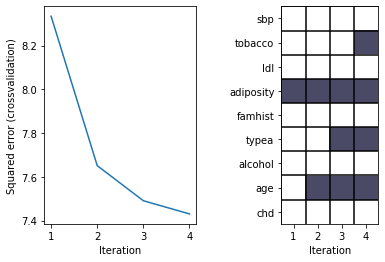

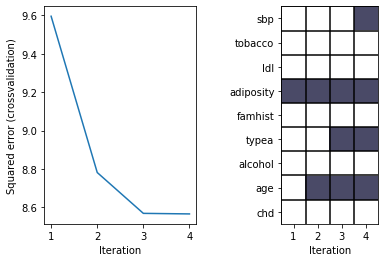

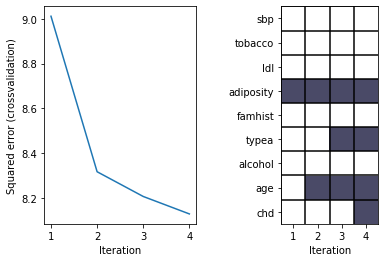

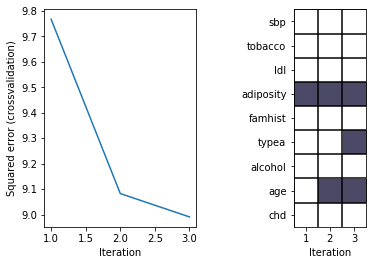

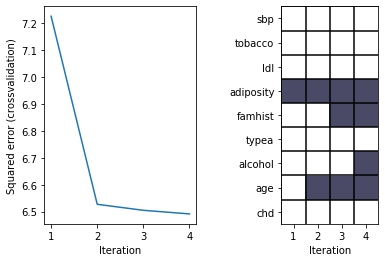

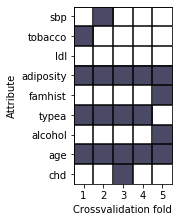

In [41]:
## Crossvalidation
# Create crossvalidation partition for evaluation
K = 5
CV = model_selection.KFold(n_splits=K,shuffle=True)

# Initialize variables
Features = np.zeros((M,K))
Error_train = np.empty((K,1))
Error_test = np.empty((K,1))
Error_train_fs = np.empty((K,1))
Error_test_fs = np.empty((K,1))
Error_train_nofeatures = np.empty((K,1))
Error_test_nofeatures = np.empty((K,1))

k=0
for train_index, test_index in CV.split(X):
    
    # extract training and test set for current CV fold
    X_train = X[train_index,:]
    y_train = y[train_index]
    X_test = X[test_index,:]
    y_test = y[test_index]
    internal_cross_validation = 10
    
    # Compute squared error without using the input data at all
    Error_train_nofeatures[k] = np.square(y_train-y_train.mean()).sum()/y_train.shape[0]
    Error_test_nofeatures[k] = np.square(y_test-y_test.mean()).sum()/y_test.shape[0]

    # Compute squared error with all features selected (no feature selection)
    m = lm.LinearRegression(fit_intercept=True).fit(X_train, y_train)
    Error_train[k] = np.square(y_train-m.predict(X_train)).sum()/y_train.shape[0]
    Error_test[k] = np.square(y_test-m.predict(X_test)).sum()/y_test.shape[0]

    # Compute squared error with feature subset selection
    #textout = 'verbose';
    textout = '';
    selected_features, features_record, loss_record = feature_selector_lr(X_train, y_train, internal_cross_validation,display=textout)
    
    Features[selected_features,k]=1
    # .. alternatively you could use module sklearn.feature_selection
    if len(selected_features) is 0:
        print('No features were selected, i.e. the data (X) in the fold cannot describe the outcomes (y).' )
    else:
        m = lm.LinearRegression(fit_intercept=True).fit(X_train[:,selected_features], y_train)
        Error_train_fs[k] = np.square(y_train-m.predict(X_train[:,selected_features])).sum()/y_train.shape[0]
        Error_test_fs[k] = np.square(y_test-m.predict(X_test[:,selected_features])).sum()/y_test.shape[0]
    
        figure(k)
        subplot(1,2,1)
        plot(range(1,len(loss_record)), loss_record[1:])
        xlabel('Iteration')
        ylabel('Squared error (crossvalidation)')    
        
        subplot(1,3,3)
        bmplot(attributeNames, range(1,features_record.shape[1]), -features_record[:,1:])
        clim(-1.5,0)
        xlabel('Iteration')

    print('Cross validation fold {0}/{1}'.format(k+1,K))
    print('Features no: {0}\n'.format(selected_features.size))

    k+=1


# Display results
print('\n')
print('Linear regression without feature selection:\n')
print('- Training error: {0}'.format(Error_train.mean()))
print('- Test error:     {0}'.format(Error_test.mean()))
print('- R^2 train:     {0}'.format((Error_train_nofeatures.sum()-Error_train.sum())/Error_train_nofeatures.sum()))
print('- R^2 test:     {0}'.format((Error_test_nofeatures.sum()-Error_test.sum())/Error_test_nofeatures.sum()))
print('Linear regression with feature selection:\n')
print('- Training error: {0}'.format(Error_train_fs.mean()))
print('- Test error:     {0}'.format(Error_test_fs.mean()))
print('- R^2 train:     {0}'.format((Error_train_nofeatures.sum()-Error_train_fs.sum())/Error_train_nofeatures.sum()))
print('- R^2 test:     {0}'.format((Error_test_nofeatures.sum()-Error_test_fs.sum())/Error_test_nofeatures.sum()))

figure(k)
subplot(1,3,2)
bmplot(attributeNames, range(1,Features.shape[1]+1), -Features)
clim(-1.5,0)
xlabel('Crossvalidation fold')
ylabel('Attribute')

    
    
show()


###  regularization

Optimal lambda selected in k=1: 10.0
Test error for optimal lambda in k=1: [3.71385592]
Optimal lambda selected in k=2: 10.0
Test error for optimal lambda in k=2: [3.01509001]
Optimal lambda selected in k=3: 10.0
Test error for optimal lambda in k=3: [5.76687422]
Optimal lambda selected in k=4: 10.0
Test error for optimal lambda in k=4: [4.67254898]
Optimal lambda selected in k=5: 10.0
Test error for optimal lambda in k=5: [3.06223648]
Optimal lambda selected in k=6: 10.0
Test error for optimal lambda in k=6: [2.45522828]
Optimal lambda selected in k=7: 10.0
Test error for optimal lambda in k=7: [3.60575084]
Optimal lambda selected in k=8: 10.0
Test error for optimal lambda in k=8: [3.38503501]
Optimal lambda selected in k=9: 10.0
Test error for optimal lambda in k=9: [2.29632193]
Optimal lambda selected in k=10: 10.0
Test error for optimal lambda in k=10: [2.28807956]


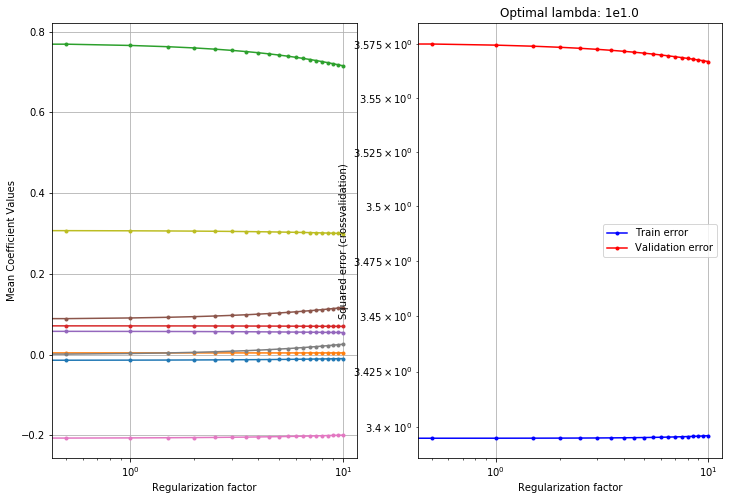

Unregularized linear regression:
- Training error: 3.2802694025306947
- Test error:     3.430801335141787
- R^2 train:     0.23322249836144818
- R^2 test:     0.17653441441455445

Regularized linear regression:
- Training error: 3.2810569952667343
- Test error:     3.426102122997844
- R^2 train:     0.23303839507103455
- R^2 test:     0.1776623256813088

Generalization error for different values of lambda:
                 0.0                3.447
                 0.5                3.446
                 1.0                3.446
                 1.5                3.446
                 2.0                3.445
                 2.5                3.445
                 3.0                3.445
                 3.5                3.444
                 4.0                3.444
                 4.5                3.444
                 5.0                3.443
                 5.5                3.443
                 6.0                3.443
                 6.5                3.442
  

In [31]:
# exercise 8.1.1

from matplotlib.pylab import (figure, semilogx, loglog, xlabel, ylabel, legend, 
                           title, subplot, show, grid)
import numpy as np
import pandas as pd
from scipy.io import loadmat
import sklearn.linear_model as lm
from sklearn import model_selection
from toolbox_02450 import rlr_validate

# our data
df = pd.read_excel('./data/heart_disease.xlsx')
raw_data = df.get_values()
attributeNames = np.asarray(df.columns)

attr_idx= list(df.columns).index('ldl')
y = raw_data[:,attr_idx]
X_cols = list(range(0,attr_idx)) + list(range(attr_idx+1,len(df.columns)))
X = raw_data[:,X_cols]
attributeNames = np.delete(attributeNames,attr_idx)
N, M = X.shape

#standerlization
#X = X - np.ones((N,1))*X.mean(axis=0)
#X = X*(1/np.std(X,0))


# Add offset attribute
X = np.concatenate((np.ones((X.shape[0],1)),X),1)
attributeNames =list(attributeNames)
attributeNames = [u'Offset']+attributeNames
M = M+1

## Crossvalidation
# Create crossvalidation partition for evaluation
K = 10
CV = model_selection.KFold(K, shuffle=True)
#CV = model_selection.KFold(K, shuffle=False)

# Values of lambda
#lambdas = np.power(10.,range(-5,9))
#lambdas = np.arange(0.0,10.5,0.5)

# Initialize variables
#T = len(lambdas)
Error_train = np.empty((K,1))
Error_test = np.empty((K,1))
Error_train_rlr = np.empty((K,1))
Error_test_rlr = np.empty((K,1))
val_error_lambdas = np.empty((K,len(lambdas)))
Error_train_nofeatures = np.empty((K,1))
Error_test_nofeatures = np.empty((K,1))
w_rlr = np.empty((M,K))
mu = np.empty((K, M-1))
sigma = np.empty((K, M-1))
w_noreg = np.empty((M,K))

k=0
for train_index, test_index in CV.split(X,y):
    
    # extract training and test set for current CV fold
    X_train = X[train_index]
    y_train = y[train_index]
    X_test = X[test_index]
    y_test = y[test_index]
    internal_cross_validation = 10   
    
    opt_val_err, opt_lambda, mean_w_vs_lambda, train_err_vs_lambda, test_err_vs_lambda = rlr_validate(X_train, y_train, lambdas, internal_cross_validation)
    val_error_lambdas[k] = test_err_vs_lambda
    

    
    # Standardize outer fold based on training set, and save the mean and standard
    # deviations since they're part of the model (they would be needed for
    # making new predictions) - for brevity we won't always store these in the scripts
    mu[k, :] = np.mean(X_train[:, 1:], 0)
    sigma[k, :] = np.std(X_train[:, 1:], 0)
    
    X_train[:, 1:] = (X_train[:, 1:] - mu[k, :] ) / sigma[k, :] 
    X_test[:, 1:] = (X_test[:, 1:] - mu[k, :] ) / sigma[k, :] 
    
    Xty = X_train.T @ y_train
    XtX = X_train.T @ X_train
    
    # Compute mean squared error without using the input data at all
    Error_train_nofeatures[k] = np.square(y_train-y_train.mean()).sum(axis=0)/y_train.shape[0]
    Error_test_nofeatures[k] = np.square(y_test-y_test.mean()).sum(axis=0)/y_test.shape[0]

    # Estimate weights for the optimal value of lambda, on entire training set
    lambdaI = opt_lambda * np.eye(M)
    lambdaI[0,0] = 0 # Do no regularize the bias term
    w_rlr[:,k] = np.linalg.solve(XtX+lambdaI,Xty).squeeze()
    # Compute mean squared error with regularization with optimal lambda
    Error_train_rlr[k] = np.square(y_train-X_train @ w_rlr[:,k]).sum(axis=0)/y_train.shape[0]
    Error_test_rlr[k] = np.square(y_test-X_test @ w_rlr[:,k]).sum(axis=0)/y_test.shape[0]
    
    #print ("{0}".format( np.abs(y_test-X_test @ w_rlr[:,k])**2))
    
    
    # Estimate weights for unregularized linear regression, on entire training set
    w_noreg[:,k] = np.linalg.solve(XtX,Xty).squeeze()
    # Compute mean squared error without regularization
    Error_train[k] = np.square(y_train-X_train @ w_noreg[:,k]).sum(axis=0)/y_train.shape[0]
    Error_test[k] = np.square(y_test-X_test @ w_noreg[:,k]).sum(axis=0)/y_test.shape[0]
    # OR ALTERNATIVELY: you can use sklearn.linear_model module for linear regression:
    #m = lm.LinearRegression().fit(X_train, y_train)
    #Error_train[k] = np.square(y_train-m.predict(X_train)).sum()/y_train.shape[0]
    #Error_test[k] = np.square(y_test-m.predict(X_test)).sum()/y_test.shape[0]
    
    
    print("Optimal lambda selected in k={0}: {1}".format(k+1, opt_lambda))
    print("Test error for optimal lambda in k={0}: {1}".format(k+1,  Error_test_rlr[k]))

    
    # Display the results for the last cross-validation fold
    if k == K-1:
        figure(k, figsize=(12,8))
        subplot(1,2,1)
        semilogx(lambdas,mean_w_vs_lambda.T[:,1:],'.-') # Don't plot the bias term
        xlabel('Regularization factor')
        ylabel('Mean Coefficient Values')
        grid()
        # You can choose to display the legend, but it's omitted for a cleaner 
        # plot, since there are many attributes
        #legend(attributeNames[1:], loc='best')
        
        subplot(1,2,2)
        title('Optimal lambda: 1e{0}'.format(np.log10(opt_lambda)))
        loglog(lambdas,train_err_vs_lambda.T,'b.-',lambdas,test_err_vs_lambda.T,'r.-')
        xlabel('Regularization factor')
        ylabel('Squared error (crossvalidation)')
        legend(['Train error','Validation error'])
        grid()
    
    # To inspect the used indices, use these print statements
    #print('Cross validation fold {0}/{1}:'.format(k+1,K))
    #print('Train indices: {0}'.format(train_index))
    #print('Test indices: {0}\n'.format(test_index))

    k+=1

show()
# Display results

    
print('Unregularized linear regression:')
print('- Training error: {0}'.format(Error_train.mean()))
print('- Test error:     {0}'.format(Error_test.mean()))
print('- R^2 train:     {0}'.format((Error_train_nofeatures.sum()-Error_train.sum())/Error_train_nofeatures.sum()))
print('- R^2 test:     {0}\n'.format((Error_test_nofeatures.sum()-Error_test.sum())/Error_test_nofeatures.sum()))
print('Regularized linear regression:')
print('- Training error: {0}'.format(Error_train_rlr.mean()))
print('- Test error:     {0}'.format(Error_test_rlr.mean()))
print('- R^2 train:     {0}'.format((Error_train_nofeatures.sum()-Error_train_rlr.sum())/Error_train_nofeatures.sum()))
print('- R^2 test:     {0}\n'.format((Error_test_nofeatures.sum()-Error_test_rlr.sum())/Error_test_nofeatures.sum()))

print('Generalization error for different values of lambda:')
for i in range(len(lambdas)):
    print('{:>20} {:>20}'.format(float(lambdas[i]), str(np.round(val_error_lambdas.mean(axis = 0)[i],3))))  
    
print('Weights in last fold:')
for m in range(M):
    print('{:>15} {:>15}'.format(attributeNames[m], np.round(w_rlr[m,-1],2)))



In [16]:
opt_lambda


1.5

In [23]:
 Error_test_rlr # the mean of it is the estimate of generalization error of our model.

array([[ 8.569746  ],
       [ 5.65591229],
       [22.87439403],
       [ 6.50504657],
       [ 5.95414923],
       [ 3.8363666 ],
       [ 7.42873592],
       [ 5.08190296],
       [ 5.3121658 ],
       [ 9.50620166]])

In [7]:
len( y_train-X_train @ w_rlr[:,1])

370

## ANN for regression

In [5]:
from matplotlib.pyplot import figure, plot, subplot, title, xlabel, ylabel, show, clim
from scipy.io import loadmat
import sklearn.linear_model as lm
from sklearn import model_selection
from toolbox_02450 import feature_selector_lr, bmplot
import numpy as np
import pandas as pd

df = pd.read_excel('./data/heart_disease.xlsx')
raw_data = df.get_values()

attributeNames = np.asarray(df.columns)

attr_idx= list(df.columns).index('obesity')
y = raw_data[:,attr_idx]

X_cols = list(range(0,attr_idx)) + list(range(attr_idx+1,len(df.columns)))
X = raw_data[:,X_cols]

attributeNames = np.delete(attributeNames,attr_idx)
N, M = X.shape

Training model of type:

Sequential(
  (0): Linear(in_features=9, out_features=2, bias=True)
  (1): Tanh()
  (2): Linear(in_features=2, out_features=1, bias=True)
)


Crossvalidation fold: 1/5

	Replicate: 1/1
		Iter	Loss			Rel. loss
		1000	483.49915	0.0003703664
		2000	344.17926	0.0003274312
		3000	247.05365	0.0003400135
		4000	173.25684	0.00037178278
		5000	117.003685	0.00041434562
		6000	75.56592	0.0004587692
		7000	47.048717	0.00048146275
		8000	29.561707	0.00042971817
		9000	20.761492	0.00026047413
		10000	17.651775	7.746887e-05
		Final loss:
		10000	17.651775	7.746887e-05

	Best loss: 17.651775360107422


Crossvalidation fold: 2/5

	Replicate: 1/1
		Iter	Loss			Rel. loss
		1000	511.79453	0.00030818474
		2000	379.4908	0.0002972943
		3000	279.8491	0.00031472862
		4000	201.32932	0.00034555965
		5000	139.74486	0.00038562072
		6000	92.96167	0.00042920763
		7000	59.430454	0.00046110345
		8000	37.57184	0.0004426811
		9000	25.395157	0.00032142882
		10000	20.238575	0.00013352482
		Final l

ValueError: shape mismatch: objects cannot be broadcast to a single shape

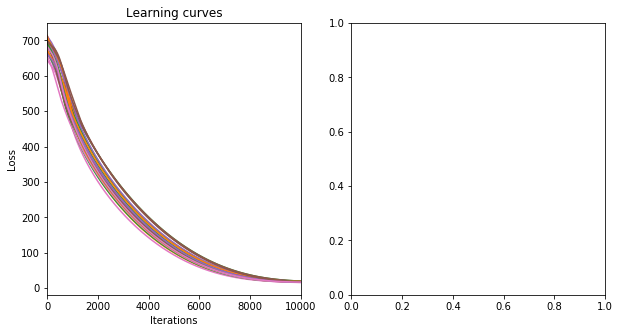

In [10]:
# exercise 8.2.6
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat
import torch
from sklearn import model_selection
from toolbox_02450 import train_neural_net, draw_neural_net
from scipy import stats


# =============================================================================
# # Load Matlab data file and extract variables of interest
# mat_data = loadmat('../Data/wine2.mat')
# attributeNames = [name[0] for name in mat_data['attributeNames'][0]]
# X = mat_data['X']
# y = X[:,[10]]             # alcohol contents (target)
# X = X[:,1:10]           # the rest of features
# N, M = X.shape
# C = 2
# =============================================================================

# Normalize data
X = stats.zscore(X);
                
## Normalize and compute PCA (change to True to experiment with PCA preprocessing)
do_pca_preprocessing = False
if do_pca_preprocessing:
    Y = stats.zscore(X,0);
    U,S,V = np.linalg.svd(Y,full_matrices=False)
    V = V.T
    #Components to be included as features
    k_pca = 3
    X = X @ V[:,0:k_pca]
    N, M = X.shape


# Parameters for neural network classifier
n_hidden_units = 2      # number of hidden units
n_replicates = 1        # number of networks trained in each k-fold
max_iter = 10000       # 

# K-fold crossvalidation
K = 5                   # only three folds to speed up this example
CV = model_selection.KFold(K, shuffle=True)

# Setup figure for display of learning curves and error rates in fold
summaries, summaries_axes = plt.subplots(1,2, figsize=(10,5))
# Make a list for storing assigned color of learning curve for up to K=10
color_list = ['tab:orange', 'tab:green', 'tab:purple', 'tab:brown', 'tab:pink',
              'tab:gray', 'tab:olive', 'tab:cyan', 'tab:red', 'tab:blue']
# Define the model
model = lambda: torch.nn.Sequential(
                    torch.nn.Linear(M, n_hidden_units), #M features to n_hidden_units
                    torch.nn.Tanh(),   # 1st transfer function,
                    torch.nn.Linear(n_hidden_units, 1), # n_hidden_units to 1 output neuron
                    # no final tranfer function, i.e. "linear output"
                    )
loss_fn = torch.nn.MSELoss() # notice how this is now a mean-squared-error loss

print('Training model of type:\n\n{}\n'.format(str(model())))
errors = [] # make a list for storing generalizaition error in each loop


k=0
for train_index, test_index in CV.split(X,y):
    
    # extract training and test set for current CV fold
    X_train = X[train_index]
    y_train = y[train_index]
    X_test = X[test_index]
    y_test = y[test_index]   
    
    for (k, (train_index_ANN, test_index_ANN)) in enumerate(CV.split(X_train,y_train)): 
        print('\nCrossvalidation fold: {0}/{1}'.format(k+1,K))    
        
        # Extract training and test set for current CV fold, convert to tensors
        X_train_ANN = torch.tensor(X[train_index_ANN,:], dtype=torch.float)
        y_train_ANN = torch.tensor(y[train_index_ANN], dtype=torch.float)
        X_test_ANN = torch.tensor(X[test_index_ANN,:], dtype=torch.float)
        y_test_ANN = torch.tensor(y[test_index_ANN], dtype=torch.uint8)
        internal_cross_validation = 10
        
        # Train the net on training data
        net, final_loss, learning_curve = train_neural_net(model,
                                                           loss_fn,
                                                           X=X_train_ANN,
                                                           y=y_train_ANN,
                                                           n_replicates=n_replicates,
                                                           max_iter=max_iter)
        
        print('\n\tBest loss: {}\n'.format(final_loss))
        
        # Determine estimated class labels for test set
        y_test_est = net(X_test_ANN)
        
        # Determine errors and errors
        se = (y_test_est.float()-y_test_ANN.float())**2 # squared error
        mse = (sum(se).type(torch.float)/len(y_test_ANN)).data.numpy() #mean
        errors.append(mse) # store error rate for current CV fold 
        
        # Display the learning curve for the best net in the current fold
        h, = summaries_axes[0].plot(learning_curve, color=color_list[k])
        h.set_label('CV fold {0}'.format(k+1))
        summaries_axes[0].set_xlabel('Iterations')
        summaries_axes[0].set_xlim((0, max_iter))
        summaries_axes[0].set_ylabel('Loss')
        summaries_axes[0].set_title('Learning curves')

        k+=1

# Display the MSE across folds
summaries_axes[1].bar(np.arange(1, K+1), np.squeeze(np.asarray(errors)), color=color_list)
summaries_axes[1].set_xlabel('Fold');
summaries_axes[1].set_xticks(np.arange(1, K+1))
summaries_axes[1].set_ylabel('MSE');
summaries_axes[1].set_title('Test mean-squared-error')
    
print('Diagram of best neural net in last fold:')
weights = [net[i].weight.data.numpy().T for i in [0,2]]
biases = [net[i].bias.data.numpy() for i in [0,2]]
tf =  [str(net[i]) for i in [1,2]]
draw_neural_net(weights, biases, tf, attribute_names=attributeNames)

# Print the average classification error rate
print('\nEstimated generalization error, RMSE: {0}'.format(round(np.sqrt(np.mean(errors)), 4)))

# When dealing with regression outputs, a simple way of looking at the quality
# of predictions visually is by plotting the estimated value as a function of 
# the true/known value - these values should all be along a straight line "y=x", 
# and if the points are above the line, the model overestimates, whereas if the
# points are below the y=x line, then the model underestimates the value
plt.figure(figsize=(10,10));
y_est = y_test_est.data.numpy(); y_true = y_test.data.numpy();
axis_range = [np.min([y_est, y_true])-1,np.max([y_est, y_true])+1]
plt.plot(axis_range,axis_range,'k--')
plt.plot(y_true, y_est,'ob',alpha=.25)
plt.legend(['Perfect estimation','Model estimations'])
plt.title('Alcohol content: estimated versus true value (for last CV-fold)')
plt.ylim(axis_range); plt.xlim(axis_range)
plt.xlabel('True value')
plt.ylabel('Estimated value')
plt.grid()

plt.show()

print('Ran Exercise 8.2.5')

# baseline of regression

In [9]:
# exercise 6.2.1
from matplotlib.pyplot import figure, plot, subplot, title, xlabel, ylabel, show, clim
from scipy.io import loadmat
import sklearn.linear_model as lm
from sklearn import model_selection
from toolbox_02450 import feature_selector_lr, bmplot
import numpy as np
from inputdata import *
# Load data from matlab file
# =============================================================================
# mat_data = loadmat('../Data/body.mat')
# X = mat_data['X']
# y = mat_data['y'].squeeze()
# attributeNames = [name[0] for name in mat_data['attributeNames'][0]]
# N, M = X.shape
# =============================================================================
## Crossvalidation
# Create crossvalidation partition for evaluation
K = 5
CV = model_selection.KFold(n_splits=K,shuffle=True)

# Initialize variables
Features = np.zeros((M,K))
Error_train = np.empty((K,1))
Error_test = np.empty((K,1))
Error_train_fs = np.empty((K,1))
Error_test_fs = np.empty((K,1))
Error_train_nofeatures = np.empty((K,1))
Error_test_nofeatures = np.empty((K,1))
y_est = np.empty(K)
k=0
for train_index, test_index in CV.split(X):
    
    # extract training and test set for current CV fold
    X_train = X[train_index,:]
    y_train = y[train_index]
    X_test = X[test_index,:]
    y_test = y[test_index]
    internal_cross_validation = 5
    f=0
    
    for train_index1, test_index1 in CV.split(X_train):
        X_train1 = X[train_index1,:]
        y_train1 = y[train_index1]
        X_test1 = X[test_index1,:]
        y_test1 = y[test_index1]        
        
        y_est[f] = np.mean(y_train1)
        
        Error_train_nofeatures[f] = np.square(y_train1-y_train1.mean()).sum()/y_train.shape[0]
        Error_test_nofeatures[f] = np.square(y_test1-y_test.mean()).sum()/y_test.shape[0]
        f=f+1
    # Compute squared error without using the input data at all
    opt_baseline = np.min(Error_test_nofeatures)
    opt_value = y_est[np.argmin(Error_test_nofeatures)]
   
    # Compute squared error with all features selected (no feature selection)
    Error_train[k] = np.square(y_train-np.mean(y_train)).sum()/y_train.shape[0]
    Error_test[k] = np.square(y_test-opt_value).sum()/y_test.shape[0]
    k=k+1
print('- Test error:     {0}'.format(Error_test.mean()))
    
print('Baseline E_test\n',Error_test)
print('baseline.py')

- Test error:     17.78061787670118
Baseline E_test
 [[12.76815459]
 [22.58927546]
 [20.4765449 ]
 [28.8355505 ]
 [23.0359136 ]
 [14.85975146]
 [14.73739796]
 [13.86813005]
 [12.58306368]
 [14.05239658]]
baseline.py


In [6]:
from matplotlib.pyplot import figure, plot, xlabel, ylabel, show
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
import sklearn.tree
import scipy.stats
import numpy as np, scipy.stats as st

# requires data from exercise 5.1.5
#from ex5_1_5 import *

#X,y = X[:,:10], X[:,10:]
# This script crates predictions from three KNN classifiers using cross-validation

test_proportion = 0.2

# hold-out
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=test_proportion)

mA = sklearn.linear_model.LinearRegression().fit(X_train,y_train)
mB = sklearn.tree.DecisionTreeRegressor().fit(X_train, y_train)

yhatA = mA.predict(X_test)
yhatB = mB.predict(X_test)[:,np.newaxis]  #  justsklearnthings

# perform statistical comparison of the models
# compute z with squared error.
zA = np.abs(y_test - yhatA ) ** 2

# compute confidence interval of model A
alpha = 0.05
CIA = st.t.interval(1-alpha, df=len(zA)-1, loc=np.mean(zA), scale=st.sem(zA))  # Confidence interval


zB = np.abs(y_test - yhatB ) ** 2
alpha = 0.05
CIB = st.t.interval(1-alpha, df=len(zB)-1, loc=np.mean(zB), scale=st.sem(zB))  # Confidence interval

# Compute confidence interval of z = zA-zB and p-value of Null hypothesis
z = zA - zB
CI = st.t.interval(1-alpha, len(z)-1, loc=np.mean(z), scale=st.sem(z))  # Confidence interval
p = st.t.cdf( -np.abs( np.mean(z) )/st.sem(z), df=len(z)-1)  # p-value

print("CIA",CIA)
print("CIB",CIB)
print("CI",CI)
print("P",p)

CIA (1.8734460817860654, 12.254726565608474)
CIB (array([25.73268133, 24.13535403, 23.08733133, 23.49316086, 21.53957873,
       23.99742225, 21.11111165, 25.68889848, 22.05432771, 25.52566144,
       23.99894654, 24.57096811, 25.78738134, 22.69371467, 25.59251828,
       21.29862234, 21.94543751, 22.26030007, 25.39130325, 25.74526378,
       23.84605382, 21.97134963, 16.64830152, 24.732056  , 25.74759539,
       22.02851666, 21.22736079, 25.46154855, 25.692391  , 21.32521367,
       25.51447312, 23.26514779, 25.64295793, 24.71105883, 21.36970926,
       25.55270224, 23.98578455, 24.60176513, 24.87561442, 22.13697451,
       25.09705826, 20.81081095, 20.86857836, 25.72962212, 25.53663799,
       25.37789441, 25.78479219, 22.47752652, 24.15802458, 18.40767704,
       21.75036683, 15.08331747, 25.78834615, 25.75178696, 25.47887205,
       25.70895862, 24.6925266 , 25.55270224, 20.52058795, 19.44432601,
       24.97592588, 14.33435269, 25.78964267, 23.72612872,  9.87546528,
       23.9405

# Classification

In [130]:
import numpy as np
import pandas as pd

df = pd.read_excel('./data/heart_disease.xlsx')
raw_data = df.get_values()
#raw_data = df_no_outliers.get_values()

cols = range(0,9) 
X = raw_data[:, cols]
attributeNames = np.asarray(df.columns[cols])

classLabels = raw_data[:,-1] # -1 takes the last column
classNames = np.unique(classLabels)
classDict = dict(zip(classNames,range(len(classNames))))

y = np.array([classDict[cl] for cl in classLabels])

N, M = X.shape
C = len(classNames)


## Logistic regression

In [131]:
from scipy import stats
from sklearn.linear_model import Ridge, LinearRegression, LogisticRegression

K1 = 10 # for model selection
K2 = 10 # for optimal parameter selection

# K-fold crossvalidation
CV1 = model_selection.KFold(n_splits=K1, shuffle=True)

X = stats.zscore(X) # standardization

# Initialize variable
logreg_test_error_k1 = np.zeros(K1)
# tree_test_error_k1 = np.zeros(K1)
ann_test_error_k1 = np.zeros(K1)
baseline_test_error_k1 = np.zeros(K1)

k1=0
for par_index, test_index in CV1.split(X):
    print('Computing CV1 fold: {0}/{1}..'.format(k1+1,K1))
    print()
    
    # extract training and test set for current CV fold
    X_par, y_par = X[par_index,:], y[par_index]
    X_test, y_test = X[test_index,:], y[test_index]
    
    CV2 = model_selection.KFold(n_splits=K2, shuffle=False)
    
    #--------------------------------Regularized - LogRegression ----------------------------------------#
    #lambda_interval = np.arange(0,10)
    lambda_interval = np.power(10.,range(-5,9))
    logreg_gen_error_rate_s = np.zeros(len(lambda_interval))
    
    for s in range(0, len(lambda_interval)):
        k2 = 0
        logreg_val_error_rate = np.zeros(K2)
        
        for train_index, val_index in CV2.split(X_par):

            # extract training and test set for current CV fold
            X_train, y_train = X_par[train_index,:], y_par[train_index]
            X_val, y_val = X_par[val_index,:], y_par[val_index]
        
            logreg_model = LogisticRegression(penalty='l2', C=1/lambda_interval[s], solver = 'lbfgs')
            logreg_model = logreg_model.fit(X_train, y_train)

            logreg_y_val_estimated = logreg_model.predict(X_val).T
            logreg_val_error_rate[k2] = np.sum(logreg_y_val_estimated != y_val) / len(y_val)
            k2 = k2 + 1
        
        logreg_gen_error_rate_s[s] = np.sum(logreg_val_error_rate) / len(logreg_val_error_rate)
            
    logreg_min_error = np.min(logreg_gen_error_rate_s)
    opt_lambda_index = np.argmin(logreg_gen_error_rate_s)
    opt_lambda = lambda_interval[opt_lambda_index]
    
    logreg_model = LogisticRegression(penalty='l2', C=1/lambda_interval[opt_lambda_index], solver = 'lbfgs')
    logreg_model = logreg_model.fit(X_par, y_par)
    
    logreg_y_test_estimated = logreg_model.predict(X_test).T
    logreg_test_error_k1[k1] = np.sum(logreg_y_test_estimated != y_test) / len(y_test)
    
    print('Error rate - regularized log-reg - CV1 fold {0}/{1}: {2}%'.format(k1+1, K1, np.round(100 * logreg_test_error_k1[k1], decimals = 2)))
    print('Optimal lambda: {0}'.format(opt_lambda))
    k1+=1
    

gen_error_logreg=np.sum(logreg_test_error_k1) / len(logreg_test_error_k1)
print('Generalization error of model:{0}' .format(gen_error_logreg))
    

Computing CV1 fold: 1/10..

Error rate - regularized log-reg - CV1 fold 1/10: 27.66%
Optimal lambda: 1e-05
Computing CV1 fold: 2/10..

Error rate - regularized log-reg - CV1 fold 2/10: 29.79%
Optimal lambda: 10.0
Computing CV1 fold: 3/10..

Error rate - regularized log-reg - CV1 fold 3/10: 32.61%
Optimal lambda: 10.0
Computing CV1 fold: 4/10..

Error rate - regularized log-reg - CV1 fold 4/10: 26.09%
Optimal lambda: 1.0
Computing CV1 fold: 5/10..

Error rate - regularized log-reg - CV1 fold 5/10: 32.61%
Optimal lambda: 10.0
Computing CV1 fold: 6/10..

Error rate - regularized log-reg - CV1 fold 6/10: 28.26%
Optimal lambda: 10.0
Computing CV1 fold: 7/10..

Error rate - regularized log-reg - CV1 fold 7/10: 23.91%
Optimal lambda: 10.0
Computing CV1 fold: 8/10..

Error rate - regularized log-reg - CV1 fold 8/10: 34.78%
Optimal lambda: 10.0
Computing CV1 fold: 9/10..

Error rate - regularized log-reg - CV1 fold 9/10: 23.91%
Optimal lambda: 10.0
Computing CV1 fold: 10/10..

Error rate - regu


## KNN


In [132]:
from scipy import stats

K1 = 10 # for model selection
K2 = 10 # for optimal parameter selection

# K-fold crossvalidation
CV1 = model_selection.KFold(n_splits=K1, shuffle=True)

X = stats.zscore(X) # standardization

# Initialize variable
knn_test_error_k1 = np.zeros(K1)

k1=0
for par_index, test_index in CV1.split(X):
    print('Computing CV1 fold: {0}/{1}..'.format(k1+1,K1))
    print()
    
    # extract training and test set for current CV fold
    X_par, y_par = X[par_index,:], y[par_index]
    X_test, y_test = X[test_index,:], y[test_index]
    
    CV2 = model_selection.KFold(n_splits=K2, shuffle=False)
    
    #--------------------------------Regularized - LogRegression ----------------------------------------#
    k_interval = range(1,40)
    knn_gen_error_rate_s = np.zeros(len(k_interval))
    
    for s in range(1, len(k_interval)):
        k2 = 0
        knn_val_error_rate = np.zeros(K2)
        
        for train_index, val_index in CV2.split(X_par):

            # extract training and test set for current CV fold
            X_train, y_train = X_par[train_index,:], y_par[train_index]
            X_val, y_val = X_par[val_index,:], y_par[val_index]
        
           # logreg_model = LogisticRegression(penalty='l2', C=1/lambda_interval[s], solver = 'lbfgs')
           # logreg_model = logreg_model.fit(X_train, y_train)
            knclassifier = KNeighborsClassifier(n_neighbors=s);
            knclassifier.fit(X_train, y_train);

            #logreg_y_val_estimated = logreg_model.predict(X_val).T
            #logreg_val_error_rate[k2] = np.sum(logreg_y_val_estimated != y_val) / len(y_val)
            y_est = knclassifier.predict(X_test);
            knn_val_error_rate[k2] = np.sum(y_est!=y_test)/len(y_val)
            k2 = k2 + 1
        
        knn_gen_error_rate_s[s] = np.sum(knn_val_error_rate) / len(knn_val_error_rate)
            
    knn_min_error = np.min(knn_gen_error_rate_s)
    opt_k_index = np.argmin(knn_gen_error_rate_s)
    opt_k = k_interval[opt_k_index]
    
    #knclassifier = LogisticRegression(penalty='l2', C=1/lambda_interval[opt_k_index], solver = 'lbfgs')
    knclassifier =KNeighborsClassifier(n_neighbors=opt_k)
    knclassifier = knclassifier.fit(X_par, y_par)
    
    knn_y_test_estimated = knclassifier.predict(X_test).T
    knn_test_error_k1[k1] = np.sum(knn_y_test_estimated != y_test) / len(y_test)
    
    print('Error rate -knn CV1 fold {0}/{1}: {2}%'.format(k1+1, K1, np.round(100 * knn_test_error_k1[k1], decimals = 2)))
    print('Optimal k: {0}'.format(opt_k))
    k1+=1
    
knn_gen_error=np.sum(knn_test_error_k1) / len(knn_test_error_k1)
print('Generalization error of model:{0}' .format(knn_gen_error))
    

Computing CV1 fold: 1/10..

Error rate -knn CV1 fold 1/10: 38.3%
Optimal k: 1
Computing CV1 fold: 2/10..

Error rate -knn CV1 fold 2/10: 36.17%
Optimal k: 1
Computing CV1 fold: 3/10..

Error rate -knn CV1 fold 3/10: 28.26%
Optimal k: 1
Computing CV1 fold: 4/10..

Error rate -knn CV1 fold 4/10: 23.91%
Optimal k: 1
Computing CV1 fold: 5/10..

Error rate -knn CV1 fold 5/10: 50.0%
Optimal k: 1
Computing CV1 fold: 6/10..

Error rate -knn CV1 fold 6/10: 32.61%
Optimal k: 1
Computing CV1 fold: 7/10..

Error rate -knn CV1 fold 7/10: 28.26%
Optimal k: 1
Computing CV1 fold: 8/10..

Error rate -knn CV1 fold 8/10: 41.3%
Optimal k: 1
Computing CV1 fold: 9/10..

Error rate -knn CV1 fold 9/10: 32.61%
Optimal k: 1
Computing CV1 fold: 10/10..

Error rate -knn CV1 fold 10/10: 45.65%
Optimal k: 1
Generalization error of model:0.3570767807585569


## baseline of classification

In [133]:
 from scipy import stats
from sklearn import model_selection

K1 = 10 # for model selection
K2 = 10 # for optimal parameter selection

# K-fold crossvalidation
CV1 = model_selection.KFold(n_splits=K1, shuffle=True)

X = stats.zscore(X) # standardization

# Initialize variable
baseline_test_error_k1 = np.zeros(K1)

k1=0
for par_index, test_index in CV1.split(X):
    print('Computing CV1 fold: {0}/{1}..'.format(k1+1,K1))
    print()
    
    # extract training and test set for current CV fold
    X_par, y_par = X[par_index,:], y[par_index]
    X_test, y_test = X[test_index,:], y[test_index]
    
    CV2 = model_selection.KFold(n_splits=K2, shuffle=False)
    
    #------------------------baseline---------------------------#
    class_1_count = y_par.sum() # class 1
    class_0_count = len(y_par) - y_par.sum() # class 0
    baseline_class = float(np.argmax([class_0_count, class_1_count]))

    baseline_test_error_k1[k1] = np.sum(y_test != baseline_class) / len(y_test)
    print('Error rate - baseline log-reg - CV1 fold {0}/{1}: {2}%'.format(k1+1, K1, np.round(100 * baseline_test_error_k1[k1], decimals = 2)))
    k1+=1;
    
bas_gen_error=np.sum(baseline_test_error_k1) / len(baseline_test_error_k1)
print('Generalization error of model:{0}' .format(bas_gen_error))    

Computing CV1 fold: 1/10..

Error rate - baseline log-reg - CV1 fold 1/10: 42.55%
Computing CV1 fold: 2/10..

Error rate - baseline log-reg - CV1 fold 2/10: 19.15%
Computing CV1 fold: 3/10..

Error rate - baseline log-reg - CV1 fold 3/10: 30.43%
Computing CV1 fold: 4/10..

Error rate - baseline log-reg - CV1 fold 4/10: 39.13%
Computing CV1 fold: 5/10..

Error rate - baseline log-reg - CV1 fold 5/10: 43.48%
Computing CV1 fold: 6/10..

Error rate - baseline log-reg - CV1 fold 6/10: 28.26%
Computing CV1 fold: 7/10..

Error rate - baseline log-reg - CV1 fold 7/10: 34.78%
Computing CV1 fold: 8/10..

Error rate - baseline log-reg - CV1 fold 8/10: 39.13%
Computing CV1 fold: 9/10..

Error rate - baseline log-reg - CV1 fold 9/10: 32.61%
Computing CV1 fold: 10/10..

Error rate - baseline log-reg - CV1 fold 10/10: 36.96%
Generalization error of model:0.34648473635522664


# statistic evaluation

KNN and Log are significantly different.
Log and baseline are significantly different.
Classifiers are not significantly different


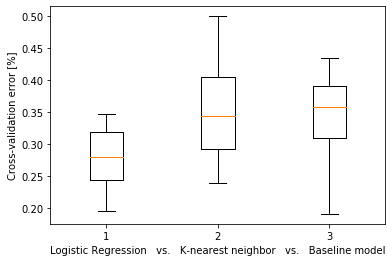

In [134]:
from matplotlib.pyplot import figure, boxplot, xlabel, ylabel, show
import numpy as np
from scipy.io import loadmat
import sklearn.linear_model as lm
from sklearn import model_selection, tree
from scipy import stats
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier

X = stats.zscore(X)


# Initialize variables

# Test if classifiers are significantly different using methods in section 9.3.3
# by computing credibility interval. Notice this can also be accomplished by computing the p-value using
# [tstatistic, pvalue] = stats.ttest_ind(Error_logreg,Error_dectree)
# and test if the p-value is less than alpha=0.05.


Error_dum = baseline_test_error_k1.reshape([10,1])
Error_knn = knn_test_error_k1.reshape([10,1])
Error_logreg = logreg_test_error_k1.reshape([10,1])

# Error_dum =np.array([18.4,18.12,16.75,18.46,16.82])
# Error_knn =np.array([18.97,12.41,11.17,11.41,11.6247])
# Error_logreg =np.array([8.2,8.08,7.44,6.64,7.95])

# Error_dum = Error_dum.reshape([5,1])
# Error_knn = Error_knn.reshape([5,1])
# Error_logreg = Error_logreg.reshape([5,1])

    #KNN and LR
z_kl = (Error_logreg-Error_knn)
zb_kl = z_kl.mean()
nu = K-1
sig_kl =  (z_kl-zb_kl).std()  / np.sqrt(K-1)
alpha = 0.05

zL_kl = zb_kl + sig_kl * stats.t.ppf(alpha/2, nu);
zH_kl = zb_kl + sig_kl * stats.t.ppf(1-alpha/2, nu);

    #LR and Baseline
z_lb = (Error_logreg-Error_dum)
zb_lb = z_lb.mean()
nu = K-1
sig_lb =  (z_lb-zb_lb).std()  / np.sqrt(K-1)
alpha = 0.05

zL_lb = zb_lb + sig_lb * stats.t.ppf(alpha/2, nu);
zH_lb = zb_lb + sig_lb * stats.t.ppf(1-alpha/2, nu);    
    
    #KNN and Baseline
z_kb = (Error_knn-Error_dum)
zb_kb = z_kb.mean()
nu = K-1
sig_kb =  (z_kb-zb_kb).std()  / np.sqrt(K-1)
alpha = 0.05

zL_kb = zb_kb + sig_kb * stats.t.ppf(alpha/2, nu);
zH_kb = zb_kb + sig_kb * stats.t.ppf(1-alpha/2, nu); 



if zL_kl <= 0 and zH_kl >= 0 :
    print('KNN and Log are not significantly different')        
else:
    print('KNN and Log are significantly different.')
    
if zL_lb <= 0 and zH_lb >= 0 :
    print('Log and baseline are not significantly different')        
else:
    print('Log and baseline are significantly different.')

if zL_kb <= 0 and zH_kb >= 0 :
    print('Classifiers are not significantly different')        
else:
    print('Classifiers are significantly different.')


# Boxplot to compare classifier error distributions
figure()
boxplot(np.concatenate((Error_logreg, Error_knn, Error_dum),axis=1))
xlabel('Logistic Regression   vs.   K-nearest neighbor   vs.   Baseline model')
ylabel('Cross-validation error [%]')

show()




In [121]:
[tstatistic, pvalue] = stats.ttest_ind(Error_logreg,Error_knn); pvalue
  

array([0.00674958])

In [122]:
[tstatistic, pvalue] = stats.ttest_ind(Error_knn,Error_dum); pvalue


array([0.01684667])

In [123]:
[tstatistic, pvalue] = stats.ttest_ind(Error_logreg,Error_dum); pvalue


array([2.73402445e-08])

In [124]:
zL_kl

-7.481901491300498

In [125]:
zH_kl

-3.427978508699502

In [126]:
zL_lb 


-10.809218032758686

In [127]:
zH_lb

-9.286781967241318

In [128]:
zL_kb


-6.5960037331334505

In [129]:
zH_kb

-2.5901162668665503